In [ ]:
!pip install seaborn

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

,Incident_ID,Month,Day,Year,Date,School,Victims_Killed,Victims_Wounded,Number_Victims,Shooter_Killed,...,City,State,School_Level,Location,Location_Type,During_Classes,Duration_min,Situation,Targets,Shots_Fired
0,20240326GATUA,3.0,26.0,2024.0,26-03-24,Turner County High School,0.0,0.0,0.0,0.0,...,Ashburn,GA,High,Basketball Court,Outside on School Property,NaN,NaN,NaN,NaN,NaN
1,20240326MOCHC,3.0,26.0,2024.0,26-03-24,Charleston Junior Senior High School,0.0,0.0,0.0,0.0,...,Charleston,MO,High,Football Field/Track,Outside on School Property,Yes,1.0,Escalation of Dispute,Victims Targeted,1
2,20240326NJWEN,3.0,26.0,2024.0,26-03-24,West Side High School,0.0,2.0,2.0,0.0,...,Newark,NJ,High,Front of School,Outside on School Property,Yes,1.0,NaN,NaN,99
3,20240325HIWAW,3.0,25.0,2024.0,25-03-24,Wailuku Elementary School,0.0,1.0,1.0,0.0,...,Wailuku,HI,Elementary,Parking Lot,Outside on School Property,No,1.0,Escalation of Dispute,NaN,1
4,20240321NJMAN,3.0,21.0,2024.0,21-03-24,Malcolm X Shabazz High School,1.0,0.0,1.0,0.0,...,Newark,NJ,High,Football Field/Track,Outside on School Property,No,1.0,NaN,Victims Targeted,99


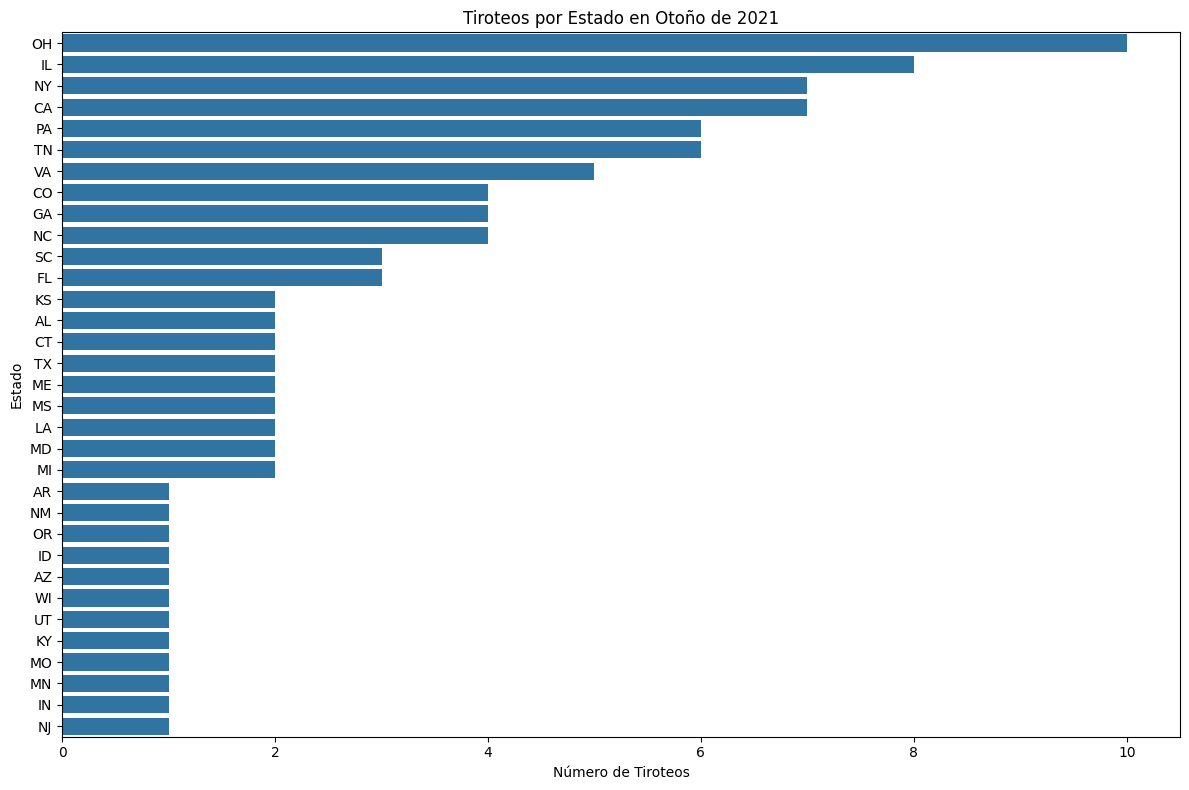

In [ ]:


# Paso 5: Añadir la columna de estación del año
# Convertir la columna 'Date' a tipo datetime
datos['Date'] = pd.to_datetime(datos['Date'])

# Función para asignar la estación del año
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Fall'

# Crear la columna 'Season'
datos['Season'] = datos['Date'].apply(get_season)

# Paso 6: Filtrar los datos para incidentes en otoño de 2021
datos_otono_2021 = datos[(datos['Year'] == 2021) & (datos['Season'] == 'Fall')]

# Paso 7: Crear y mostrar la visualización
plt.figure(figsize=(12, 8))
sns.countplot(data=datos_otono_2021, y='State', order=datos_otono_2021['State'].value_counts().index)
plt.title('Tiroteos por Estado en Otoño de 2021')
plt.xlabel('Número de Tiroteos')
plt.ylabel('Estado')
plt.tight_layout()

# Guardar la visualización en un archivo PNG
plt.savefig('/content/tiroteos_otono_2021.png')
plt.show()


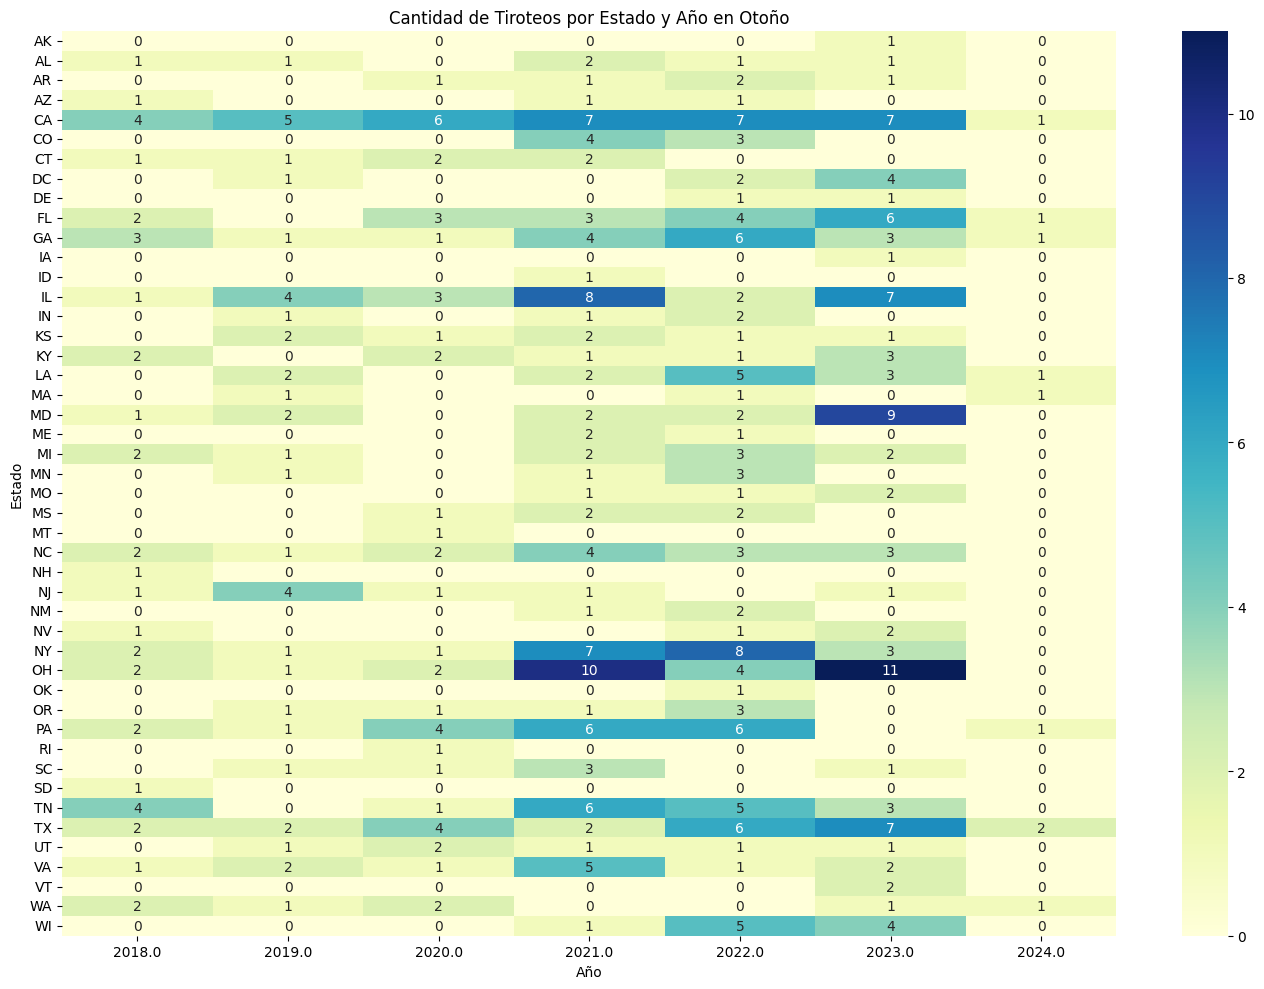

In [ ]:


# Paso 5: Añadir la columna de estación del año
# Convertir la columna 'Date' a tipo datetime
datos['Date'] = pd.to_datetime(datos['Date'])

# Función para asignar la estación del año
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Fall'

# Crear la columna 'Season'
datos['Season'] = datos['Date'].apply(get_season)

# Paso 6: Filtrar los datos para incidentes en otoño
datos_otono = datos[datos['Season'] == 'Fall']

# Paso 7: Crear una tabla pivot
tabla_pivot = datos_otono.pivot_table(index='State', columns='Year', aggfunc='size', fill_value=0)

# Paso 8: Crear y mostrar la visualización
plt.figure(figsize=(14, 10))
sns.heatmap(tabla_pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Cantidad de Tiroteos por Estado y Año en Otoño')
plt.xlabel('Año')
plt.ylabel('Estado')
plt.tight_layout()

# Guardar la visualización en un archivo PNG
plt.savefig('/content/tiroteos_estado_ano_otono.png')
plt.show()


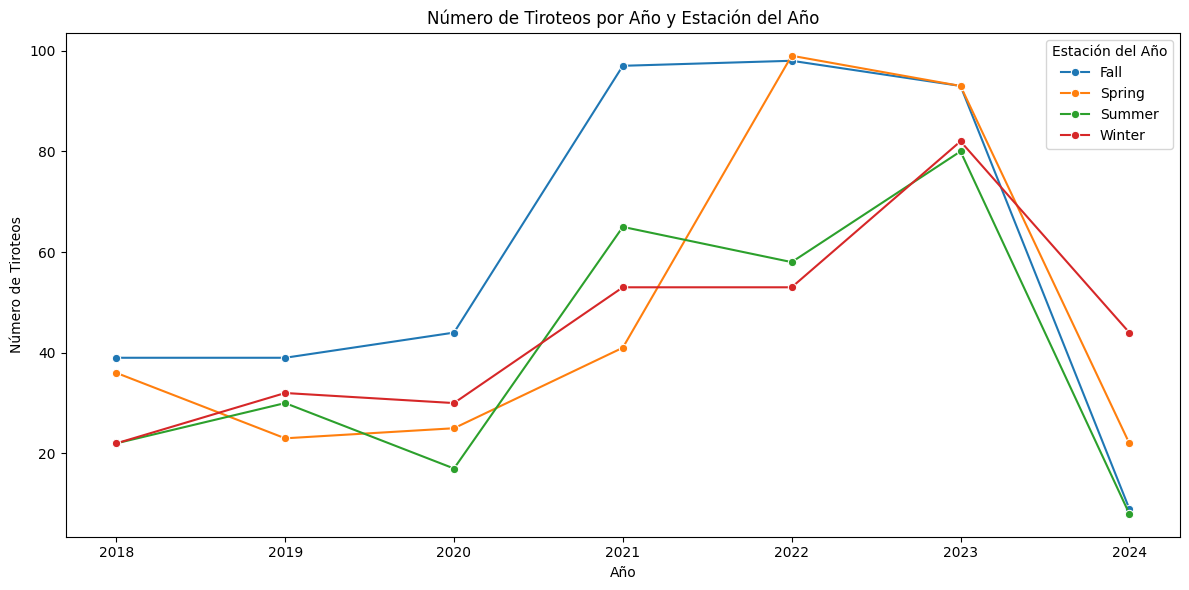

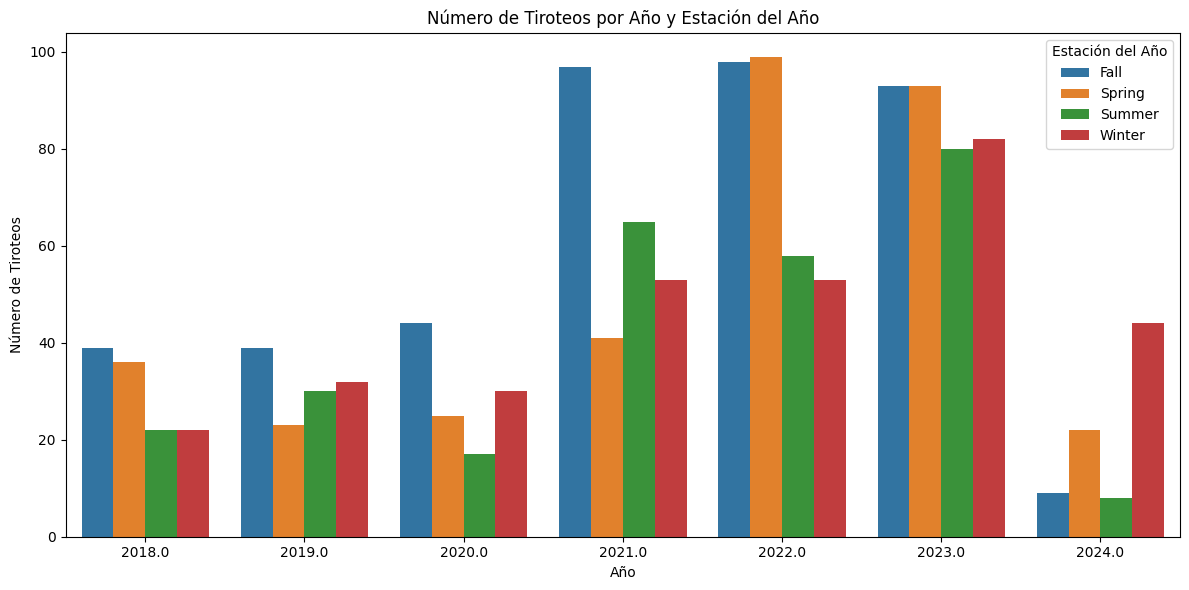

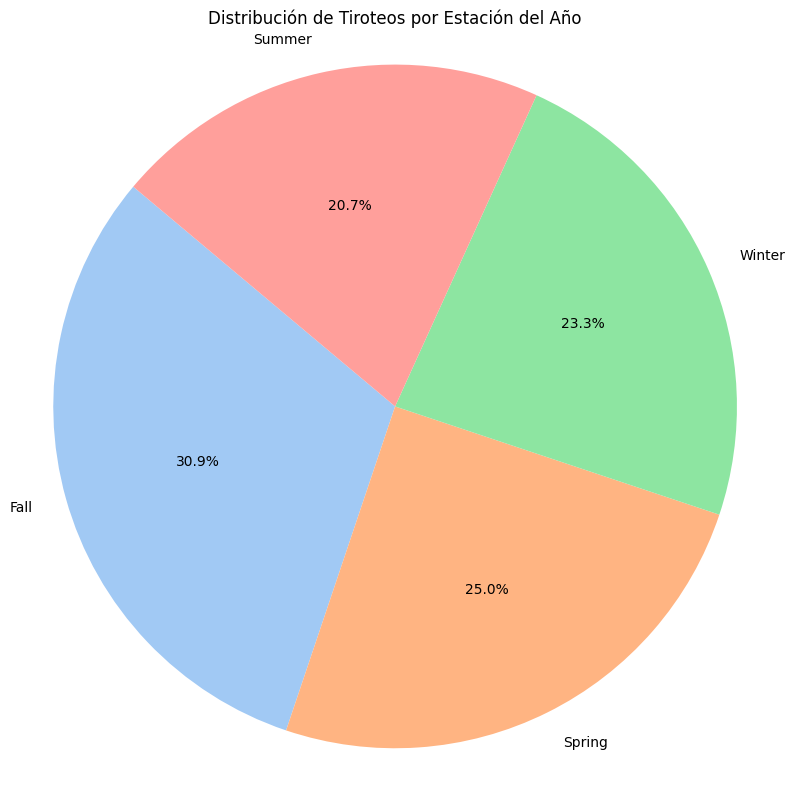

In [ ]:

# Paso 5: Añadir la columna de estación del año
# Convertir la columna 'Date' a tipo datetime
datos['Date'] = pd.to_datetime(datos['Date'])

# Función para asignar la estación del año
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Fall'

# Crear la columna 'Season'
datos['Season'] = datos['Date'].apply(get_season)

# Paso 6: Crear las visualizaciones

# Gráfico de Líneas
# Contar el número de tiroteos por año y estación del año
tiroteos_por_ano_y_estacion = datos.groupby(['Year', 'Season']).size().reset_index(name='Count')

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=tiroteos_por_ano_y_estacion, x='Year', y='Count', hue='Season', marker='o')
plt.title('Número de Tiroteos por Año y Estación del Año')
plt.xlabel('Año')
plt.ylabel('Número de Tiroteos')
plt.legend(title='Estación del Año')
plt.tight_layout()

# Guardar el gráfico de líneas
plt.savefig('/content/tiroteos_lineas.png')
plt.show()

# Gráfico de Barras
# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=tiroteos_por_ano_y_estacion, x='Year', y='Count', hue='Season')
plt.title('Número de Tiroteos por Año y Estación del Año')
plt.xlabel('Año')
plt.ylabel('Número de Tiroteos')
plt.legend(title='Estación del Año')
plt.tight_layout()

# Guardar el gráfico de barras
plt.savefig('/content/tiroteos_barras.png')
plt.show()

# Gráfico Circular
# Contar el número de tiroteos por estación del año
tiroteos_por_estacion = datos['Season'].value_counts()

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(tiroteos_por_estacion, labels=tiroteos_por_estacion.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Distribución de Tiroteos por Estación del Año')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# Guardar el gráfico circular
plt.savefig('/content/tiroteos_circular.png')
plt.show()


<ipython-input-14-dd1e5e731f10>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tiroteos_por_estado, x='State', y='Count', palette='viridis')


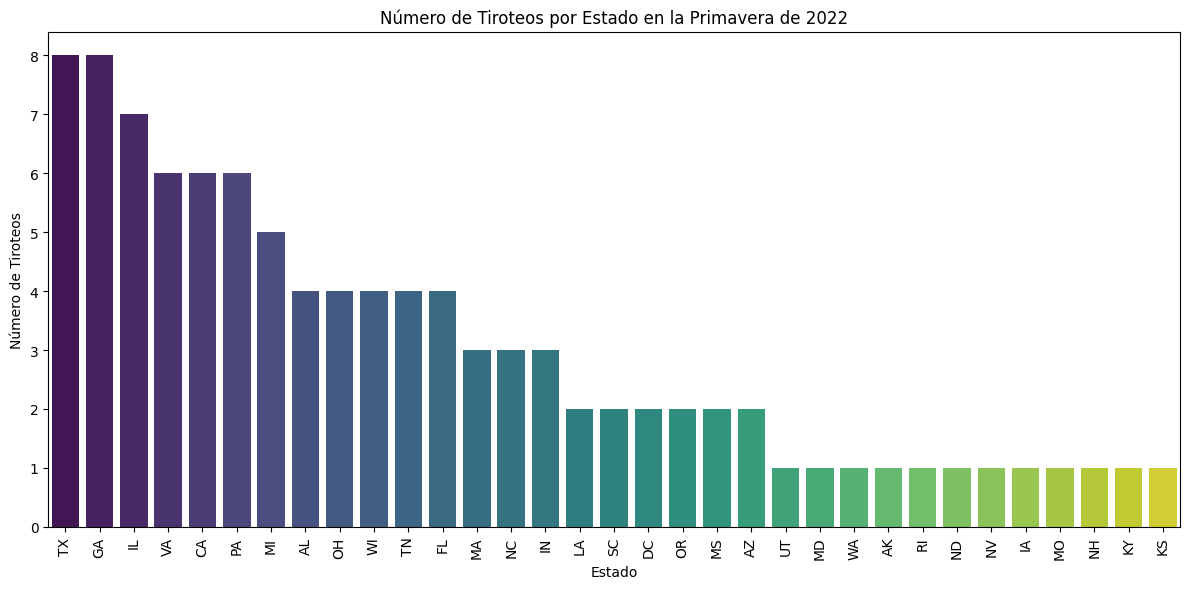

In [ ]:

# Paso 6: Filtrar los datos para incidentes en primavera de 2022
datos_primavera_2022 = datos[(datos['Season'] == 'Spring') & (datos['Year'] == 2022)]

# Paso 7: Contar el número de tiroteos por estado
tiroteos_por_estado = datos_primavera_2022['State'].value_counts().reset_index()
tiroteos_por_estado.columns = ['State', 'Count']

# Paso 8: Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=tiroteos_por_estado, x='State', y='Count', palette='viridis')
plt.title('Número de Tiroteos por Estado en la Primavera de 2022')
plt.xlabel('Estado')
plt.ylabel('Número de Tiroteos')
plt.xticks(rotation=90)
plt.tight_layout()

# Guardar la visualización en un archivo PNG
plt.savefig('/content/tiroteos_primavera_2022.png')
plt.show()


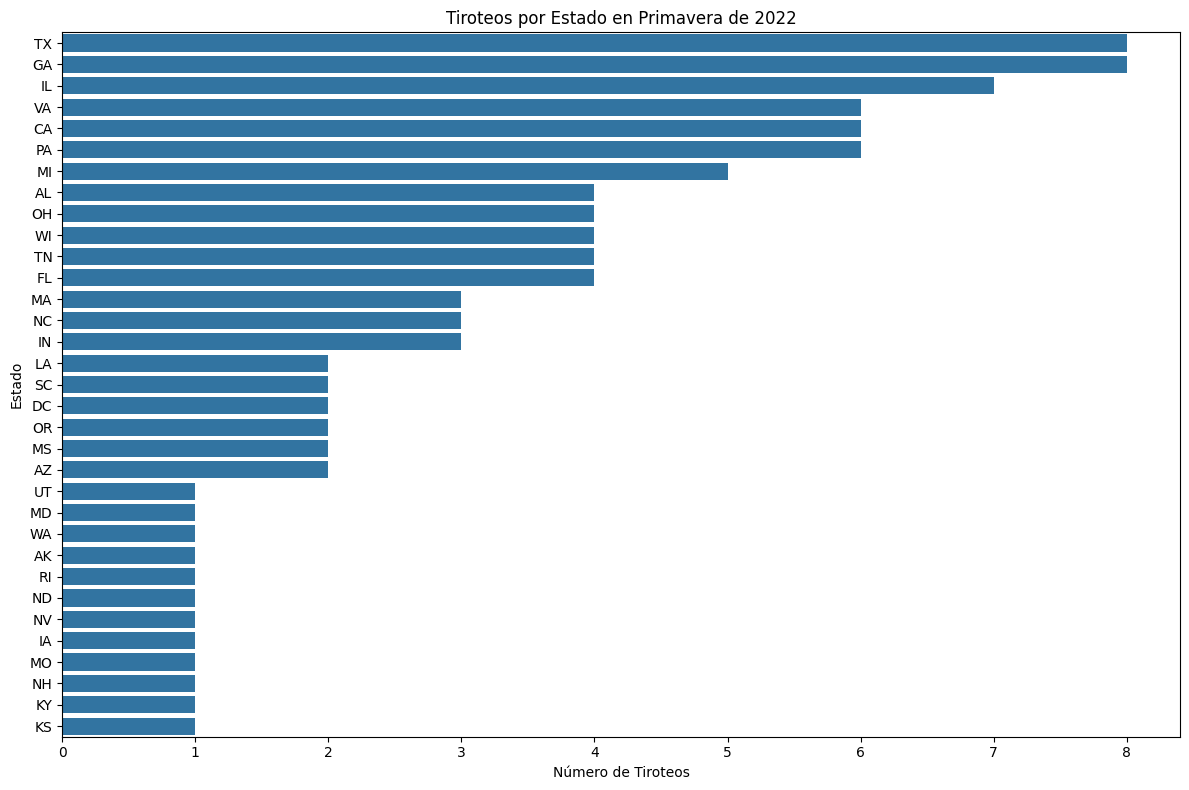

In [ ]:
# Paso 5: Añadir la columna de estación del año
# Convertir la columna 'Date' a tipo datetime
datos['Date'] = pd.to_datetime(datos['Date'])

# Función para asignar la estación del año
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Fall'

# Crear la columna 'Season'
datos['Season'] = datos['Date'].apply(get_season)

# Paso 6: Filtrar los datos para incidentes en primavera de 2022
datos_primavera_2022 = datos[(datos['Year'] == 2022) & (datos['Season'] == 'Spring')]

# Paso 7: Crear y mostrar la visualización
plt.figure(figsize=(12, 8))
sns.countplot(data=datos_primavera_2022, y='State', order=datos_primavera_2022['State'].value_counts().index)
plt.title('Tiroteos por Estado en Primavera de 2022')
plt.xlabel('Número de Tiroteos')
plt.ylabel('Estado')
plt.tight_layout()

# Guardar la visualización en un archivo PNG
plt.savefig('/content/tiroteos_primavera_2022.png')
plt.show()

In [ ]:
# Filtrar los datos para incidentes en otoño de 2021
datos_otono_2021 = datos[(datos['Season'] == 'Fall') & (datos['Year'] == 2021)]

# Filtrar los datos para incidentes en primavera de 2022
datos_primavera_2022 = datos[(datos['Season'] == 'Spring') & (datos['Year'] == 2022)]


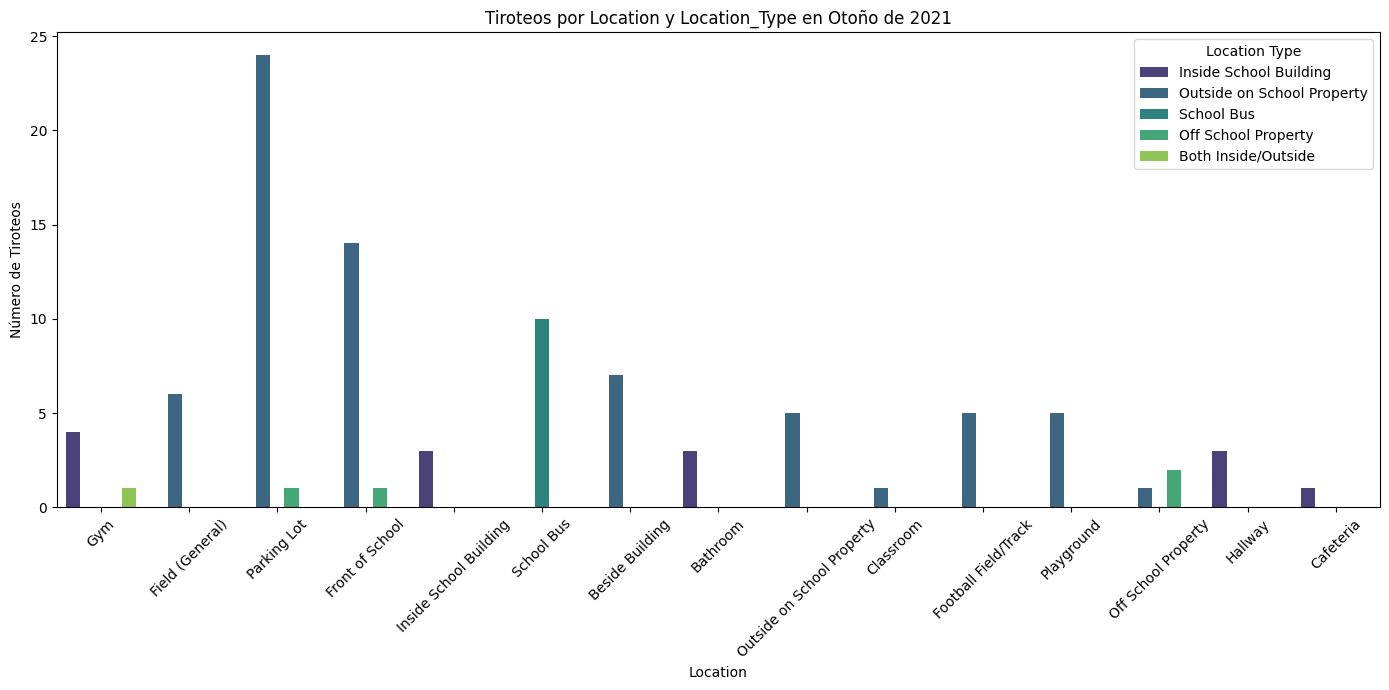

In [ ]:
# Crear el gráfico de barras agrupadas para otoño de 2021
plt.figure(figsize=(14, 7))
sns.countplot(data=datos_otono_2021, x='Location', hue='Location_Type', palette='viridis')
plt.title('Tiroteos por Location y Location_Type en Otoño de 2021')
plt.xlabel('Location')
plt.ylabel('Número de Tiroteos')
plt.xticks(rotation=45)
plt.legend(title='Location Type')
plt.tight_layout()

# Guardar la visualización en un archivo PNG
plt.savefig('/content/tiroteos_otono_2021.png')
plt.show()


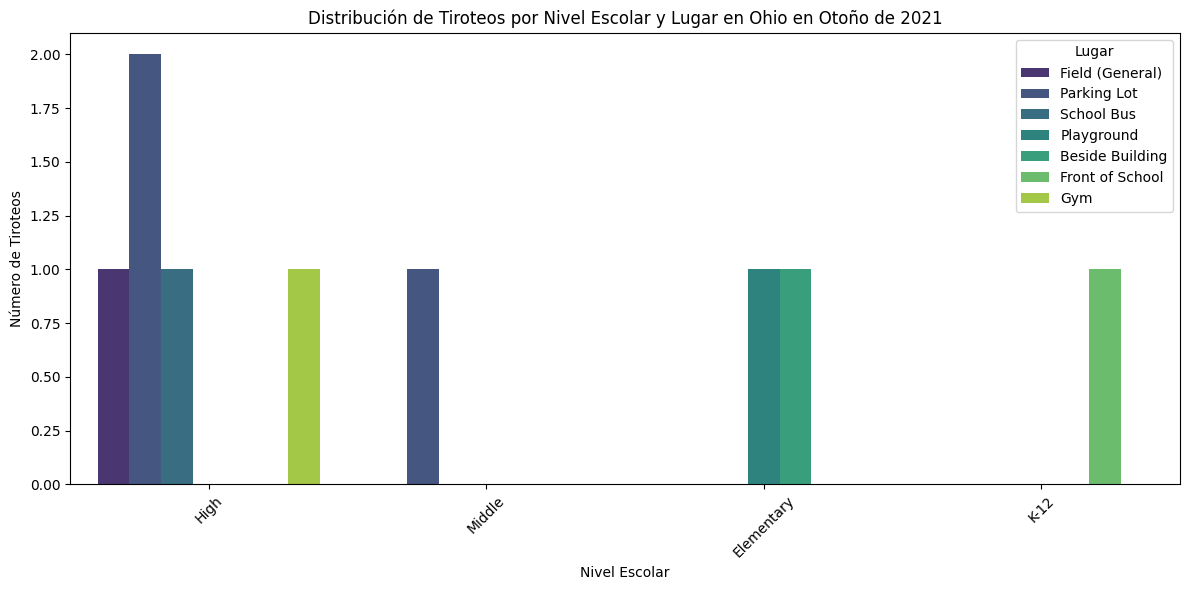

In [ ]:
# Filtrar los datos para incidentes en Ohio en otoño de 2021
datos_ohio_otono_2021 = datos[(datos['State'] == 'OH') & (datos['Season'] == 'Fall') & (datos['Year'] == 2021)]

# Crear un gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
sns.countplot(data=datos_ohio_otono_2021, x='School_Level', hue='Location', palette='viridis')
plt.title('Distribución de Tiroteos por Nivel Escolar y Lugar en Ohio en Otoño de 2021')
plt.xlabel('Nivel Escolar')
plt.ylabel('Número de Tiroteos')
plt.xticks(rotation=45)
plt.legend(title='Lugar')
plt.tight_layout()

# Mostrar la visualización
plt.show()


In [ ]:
# Paso 1: Instalar seaborn (si no está instalado)
!pip install seaborn

# Paso 2: Cargar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 3: Cargar los datos desde el archivo CSV

# Paso 4: Cargar los datos desde el archivo CSV
datos = pd.read_csv('/content/incidents-new.csv')



<ipython-input-8-6735ff03ea82>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tiroteos_por_año, x='Year', y='Count', palette='viridis')


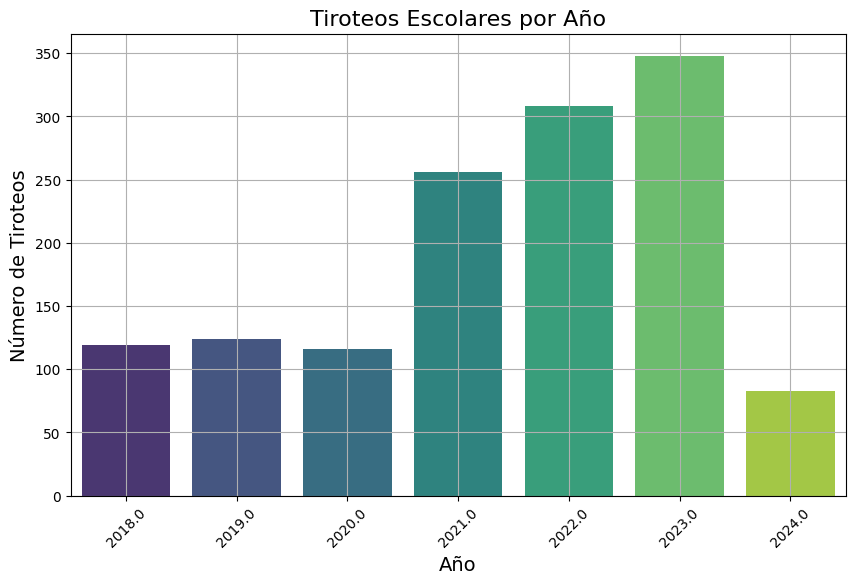

In [ ]:


# Paso 4: Agrupar los datos por año y contar el número de tiroteos escolares por año
tiroteos_por_año = datos.groupby('Year').size().reset_index(name='Count')

# Paso 5: Crear la visualización de tiroteos escolares por año
plt.figure(figsize=(10, 6))
sns.barplot(data=tiroteos_por_año, x='Year', y='Count', palette='viridis')

# Paso 6: Personalizar la visualización
plt.title('Tiroteos Escolares por Año', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Tiroteos', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

# Paso 7: Mostrar la visualización
plt.show()


In [ ]:
# Paso 7: Guardar la visualización como un archivo de imagen
plt.savefig('tiroteos_escolares_por_año.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
# Paso 5: Añadir la columna de estación del año
# Convertir la columna 'Date' a tipo datetime
datos['Date'] = pd.to_datetime(datos['Date'])

# Función para asignar la estación del año
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Fall'

# Crear la columna 'Season'
datos['Season'] = datos['Date'].apply(get_season)

# Paso 6: Filtrar los datos para incidentes en otoño
datos_otono = datos[datos['Season'] == 'Fall']

# Paso 7: Crear una tabla pivot
tabla_pivot = datos_otono.pivot_table(index='State', columns='Year', aggfunc='size', fill_value=0)

# Paso 8: Crear y mostrar la visualización
plt.figure(figsize=(14, 10))
sns.heatmap(tabla_pivot, annot=True, fmt="d", cmap="Blues")
plt.title('Cantidad de Tiroteos por Estado y Año en Otoño')
plt.xlabel('Año')
plt.ylabel('Estado')
plt.tight_layout()

# Guardar la visualización en un archivo PNG
plt.savefig('/content/tiroteos_estado_ano_otono.png')
plt.show()


NameError: name 'pd' is not defined

<ipython-input-3-2a1d66c6596e>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datos['Date'] = pd.to_datetime(datos['Date'])


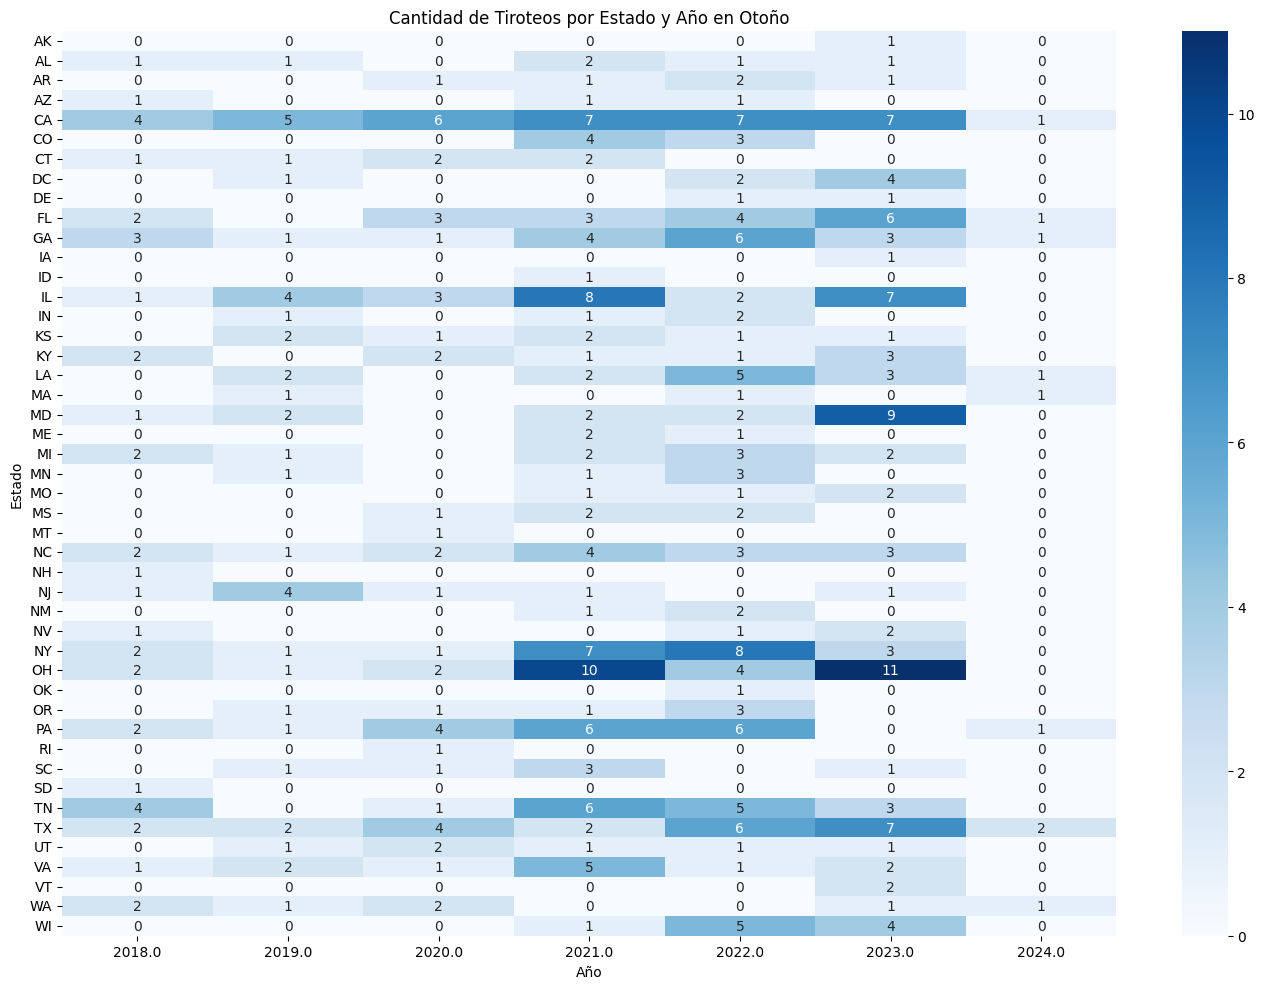

In [ ]:
# Paso 3: Instalar seaborn (si no está instalado)
!pip install seaborn

# Paso 3: Cargar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 4: Cargar los datos desde el archivo CSV
datos = pd.read_csv('/content/incidents-new.csv')

# Paso 5: Añadir la columna de estación del año
# Convertir la columna 'Date' a tipo datetime
datos['Date'] = pd.to_datetime(datos['Date'])

# Función para asignar la estación del año
def get_season(date):
    if date.month in [12, 1, 2]:
        return 'Winter'
    elif date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Fall'

# Crear la columna 'Season'
datos['Season'] = datos['Date'].apply(get_season)

# Paso 6: Filtrar los datos para incidentes en otoño
datos_otono = datos[datos['Season'] == 'Fall']

# Paso 7: Crear una tabla pivot
tabla_pivot = datos_otono.pivot_table(index='State', columns='Year', aggfunc='size', fill_value=0)

# Paso 8: Crear y mostrar la visualización
plt.figure(figsize=(14, 10))
sns.heatmap(tabla_pivot, annot=True, fmt="d", cmap="Blues")
plt.title('Cantidad de Tiroteos por Estado y Año en Otoño')
plt.xlabel('Año')
plt.ylabel('Estado')
plt.tight_layout()

# Guardar la visualización en un archivo PNG
plt.savefig('/content/tiroteos_estado_ano_otono.png')
plt.show()



In [ ]:
# Guardar la visualización en un archivo JPG
plt.savefig('/content/incidents-new.csv', format='jpg', quality=95)
plt.show()

TypeError: FigureCanvasAgg.print_jpg() got an unexpected keyword argument 'quality'

<Figure size 640x480 with 0 Axes>

In [ ]:
! pip install seaborn

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
datos = pd.read_csv('/content/incidents-new.csv')
datos.head()

,Incident_ID,Month,Day,Year,Date,School,Victims_Killed,Victims_Wounded,Number_Victims,Shooter_Killed,...,City,State,School_Level,Location,Location_Type,During_Classes,Duration_min,Situation,Targets,Shots_Fired
0,20240326GATUA,3.0,26.0,2024.0,26-03-24,Turner County High School,0.0,0.0,0.0,0.0,...,Ashburn,GA,High,Basketball Court,Outside on School Property,NaN,NaN,NaN,NaN,NaN
1,20240326MOCHC,3.0,26.0,2024.0,26-03-24,Charleston Junior Senior High School,0.0,0.0,0.0,0.0,...,Charleston,MO,High,Football Field/Track,Outside on School Property,Yes,1.0,Escalation of Dispute,Victims Targeted,1
2,20240326NJWEN,3.0,26.0,2024.0,26-03-24,West Side High School,0.0,2.0,2.0,0.0,...,Newark,NJ,High,Front of School,Outside on School Property,Yes,1.0,NaN,NaN,99
3,20240325HIWAW,3.0,25.0,2024.0,25-03-24,Wailuku Elementary School,0.0,1.0,1.0,0.0,...,Wailuku,HI,Elementary,Parking Lot,Outside on School Property,No,1.0,Escalation of Dispute,NaN,1
4,20240321NJMAN,3.0,21.0,2024.0,21-03-24,Malcolm X Shabazz High School,1.0,0.0,1.0,0.0,...,Newark,NJ,High,Football Field/Track,Outside on School Property,No,1.0,NaN,Victims Targeted,99
